Image Classification
- Import the necessry libraries
- Preprocessing on the datastet
    - Traing and test data generators

In [113]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

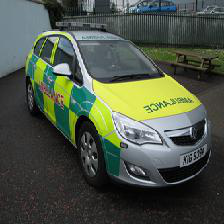

In [114]:
tf.keras.preprocessing.image.load_img(r"C:\Users\younu\Desktop\My Py Scripts\Git Repos\11_Emergency Vehicle Detection\Dataset\images\0.jpg")

In [115]:
df = pd.read_csv(r"C:\Users\younu\Desktop\My Py Scripts\Git Repos\11_Emergency Vehicle Detection\Dataset\emergency_classification.csv")
df.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [116]:
df['emergency_or_not'].value_counts()

emergency_or_not
0    1361
1     991
Name: count, dtype: int64

In [117]:
df.tail()

,image_names,emergency_or_not
2347,2347.jpg,0
2348,2348.jpg,0
2349,2349.jpg,0
2350,2350.jpg,0
2351,2351.jpg,0


In [118]:
train_df = df.groupby('emergency_or_not', group_keys = False).apply(lambda x: x.sample(frac = 0.8, random_state = 0))
test_df = df.drop(train_df.index)

train_df.head()

,image_names,emergency_or_not
2126,2126.jpg,0
1648,1648.jpg,0
2021,2021.jpg,0
1911,1911.jpg,0
1790,1790.jpg,0


In [119]:
test_df.head()

,image_names,emergency_or_not
9,9.jpg,1
11,11.jpg,1
19,19.jpg,1
23,23.jpg,1
28,28.jpg,1


In [120]:
print(train_df.shape, test_df.shape)

(1882, 2) (470, 2)


In [121]:
test_df['emergency_or_not'].value_counts()

emergency_or_not
0    272
1    198
Name: count, dtype: int64

In [122]:
test_df = df.groupby('emergency_or_not', group_keys = False).apply(lambda x: x.sample(frac = 0.2, random_state = 0))
test_df.head()

,image_names,emergency_or_not
2126,2126.jpg,0
1648,1648.jpg,0
2021,2021.jpg,0
1911,1911.jpg,0
1790,1790.jpg,0


In [123]:
train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)
test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)

In [124]:
print(train_df.shape, test_df.shape)

(1882, 2) (470, 2)


In [125]:
test_df['emergency_or_not'].value_counts()

emergency_or_not
0    272
1    198
Name: count, dtype: int64

In [126]:
training_data_generator = ImageDataGenerator(rotation_range = 30, 
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2, 
                                       shear_range = 0.2, 
                                       zoom_range = 0.3, 
                                       channel_shift_range = 0.2,
                                       fill_mode = 'nearest', 
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       rescale = 1./255)

testing_data_generator = ImageDataGenerator(rescale = 1./255)

In [127]:
folder_path = r"C:\Users\younu\Desktop\My Py Scripts\Git Repos\11_Emergency Vehicle Detection\Dataset\images"

In [128]:
train_generator = training_data_generator.flow_from_dataframe(train_df, directory = folder_path, 
                                                             x_col = 'image_names', y_col = 'emergency_or_not',
                                                             target_size = (200, 200), class_mode = 'binary')

Found 1882 validated image filenames belonging to 2 classes.


In [129]:
test_generator = testing_data_generator.flow_from_dataframe(test_df, directory = folder_path, 
                                                             x_col = 'image_names', y_col = 'emergency_or_not',
                                                             target_size = (200, 200), class_mode = 'binary')

Found 470 validated image filenames belonging to 2 classes.


In [130]:
vgg16_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (200, 200, 3))
vgg16_model.trainable = False # We give false to not change the actual VGG model trained with imagenet

In [132]:
output = vgg16_model.layers[-1].output  # -1 to access the last layer (Dense layer)
flatten = Flatten()(output)

In [133]:
dense1 = Dense(512, activation = 'relu')(flatten)
dense2 = Dense(512, activation = 'relu')(dense1)
output1 = Dense(1, activation = 'sigmoid', name = 'emergency_or_not')(dense2)

model = Model(inputs = vgg16_model.input, outputs = output1)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emergency_or_not (Dense)        │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,415,553 (93.14 MB)

 Trainable params: 9,700,865 (37.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [134]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, batch_size = 32, epochs = 10, validation_data = test_generator)

Epoch 1/10


C:\Users\younu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 337s 6s/step - accuracy: 0.6189 - loss: 1.2496 - val_accuracy: 0.8574 - val_loss: 0.3211
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 483s 8s/step - accuracy: 0.8109 - loss: 0.4330 - val_accuracy: 0.8255 - val_loss: 0.3859
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 424s 7s/step - accuracy: 0.8478 - loss: 0.3490 - val_accuracy: 0.8872 - val_loss: 0.2832
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 407s 7s/step - accuracy: 0.8543 - loss: 0.3476 - val_accuracy: 0.8957 - val_loss: 0.2506
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 407s 7s/step - accuracy: 0.8610 - loss: 0.3285 - val_accuracy: 0.8766 - val_loss: 0.2838
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 392s 7s/step - accuracy: 0.8596 - loss: 0.3147 - val_accuracy: 0.9106 - val_loss: 0.2271
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 411s 7s/step - accuracy: 0.8845 - loss: 0.2983 - val_accuracy: 0.9064 - val_loss: 0.2154
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8596 - loss: 0.3285

In [ ]:
history.history.keys()

In [ ]:
x = np.linspace(1, 10, 10)

fig, axs = plt.subplots(2, 2, figsize = (12, 10))

axs[0, 0].plot(x, history.history['accuracy'], 'b')
axs[0, 0].set_title('Traing Accuracy')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')

axs[0, 1].plot(x, history.history['loss'], 'r')
axs[0, 1].set_title('Traing Loss')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Loss')

axs[1, 0].plot(x, history.history['val_accuracy'], 'g')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Accuracy')

axs[1, 1].plot(x, history.history['loss'], 'k')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
test_generator.class_indices

In [ ]:
# Checking the predicton probability of each class in test dataset

predictions = model.predict(test_generator, verbose = 1)
predictions

In [ ]:
# Converting the predictions into labels

predicted_classes = np.argmax(predictions, axis = 1)
predicted_classes

In [ ]:
true_classes = test_generator.labels

In [ ]:
accuracy_score(true_classes, predicted_classes)

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

In [ ]:
test_generator.class_indices

In [ ]:
confu_matrix = confusion_matrix(true_classes, predictions)
ns.heatmap(confu_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())